In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_regression

In [2]:
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=2, random_state=200)
m = 200

##### Gráfica de la regresión

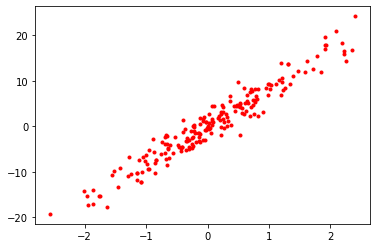

In [3]:
plt.scatter(X, y, c="red", marker=".")

##### Modelo lineal

In [4]:
def h(X, w):
    return (w[1] * np.array(X[:, 0]) + w[0])

##### Función de pérdida y técnica de descenso del gradiente

In [5]:
def cost(w, X, y):
    return (.5 / m) * np.sum(np.square(h(X, w) - np.array(y)))

In [6]:
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1 / m) * np.sum(h(X, w) - np.array(y))
    g[1] = (1 / m) * np.sum((h(X, w) - np.array(y)) * np.array(X[:, 0]))
    return g

In [7]:
def descent(w_new, w_prev, lr):
    print('initial w = ', w_prev)
    print('initial cost = ', cost(w_prev, X, y))
    print('\nLearning process')
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr * grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        print('w = ', w_new)
        print('cost = ', cost(w_new, X, y))
        if (w_new[0] - w_prev[0]) ** 2 + (w_new[1] - w_prev[1]) ** 2 <= pow(10, -6):
            return w_new
        if j > 500:
            return w_new
        j += 1


##### Ejecución

In [8]:
w = [1, 1]

w = descent(w, w, .1)
print('\nfinal w = ', w)
print('final cost = ', cost(w, X, y))

initial w =  [1, 1]
initial cost =  25.985624283260627

Learning process
w =  [0.961378747013862, 1.6603598555945491]
cost =  21.811483326250816
w =  [0.9217298369932873, 2.2596242678718044]
cost =  18.3705139134818
w =  [0.8816084305243458, 2.803479757959218]
cost =  15.533283211389607
w =  [0.8414720650162225, 3.2970801656434126]
cost =  13.193332919123698
w =  [0.8016943613771033, 3.745096885759515]
cost =  11.263077605989603
w =  [0.7625769880358844, 4.151764333539822]
cost =  9.670439782432291
w =  [0.724360091903363, 4.520921095300944]
cost =  8.35608853729399
w =  [0.6872313815278358, 4.856047176875461]
cost =  7.271172800463746
w =  [0.6513340261207899, 5.160297722488642]
cost =  6.375460080167581
w =  [0.6167735150010565, 5.436533540925707]
cost =  5.635807695694064
w =  [0.5836236050567111, 5.687348743454509]
cost =  5.0249067452964695
w =  [0.5519314688096015, 5.915095768723208]
cost =  4.520249857980758
w =  [0.521722142370967, 6.121908043436779]
cost =  4.103282619128459
w

##### Gráfica final

In [9]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)


def my_formula(x):
    return w[1] * x + w[0]

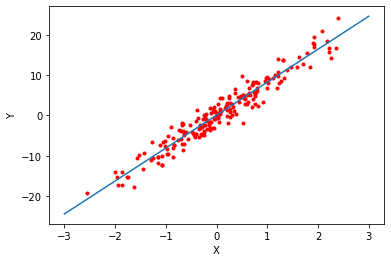

In [10]:
plt.scatter(X, y, c="red", marker=".")
graph(my_formula, range(-3, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()